In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
from smpl import plot
print (mg.get_path())
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

/opt/MG5_aMC_v2_7_0/
~/git/resummino_ug_to_UX_vNLO/


Running: 15 jobs


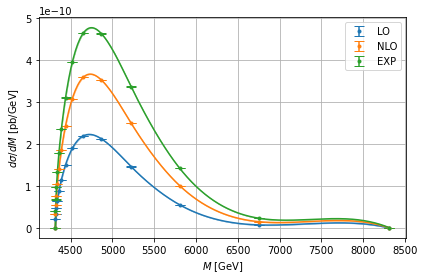

In [12]:
for run_plot in [False,]:
    for diff_m,scenario in [(4000,"scenarioA.in"),]:
        pdfs = [("MSHT20lo_as130","MSHT20nlo_as118"), #("CT18NLO","CT18NLO"),  ("NNPDF40_lo_as_01180","NNPDF40_nlo_as_01180")
        ]
        for lo_pdf,nlo_pdf in pdfs:
            for p in [2000002]:
                li = [hepi.Input(hepi.Order.NLO_PLUS_NLL, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.001,max_iters=25,id="full_r1")]

                
                li = hepi.scan_invariant_mass(li, diff_m,14+1)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False)

                if not run_plot:
                    #dl = hepi.scale_error(li,dl)
                    plot.data([],[],init=True,data_color='k')
                    #mask = dl["LO_SCALE"]!=np.array(None)
                    hepi.plot(dl, "invariant_mass", "LO",           plot_data=True,fill=True,logy=False, label="LO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    hepi.plot(dl, "invariant_mass", "NLO",         plot_data=True,fill=True,logy=False, label="NLO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    hepi.plot(dl, "invariant_mass", "NLO_PLUS_NLL", plot_data=True,fill=True,logy=False, label="EXP",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plt.show()
                    #plt.savefig(input.get_output_dir() + get_job_name() +  "_inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")

                    #hepi.mass_and_ratio_plot(dl,li,"invariant_mass",scale=True,plot_data=False,fill=True,scenario=scenario[0:8]+ " " + scenario[8],yscale=10**6,unit="ab")
                    #plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_ratio_" + nlo_pdf + "_" + str(p)+ "_" + str("inv") + "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)
    #wait()



Running: 15 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

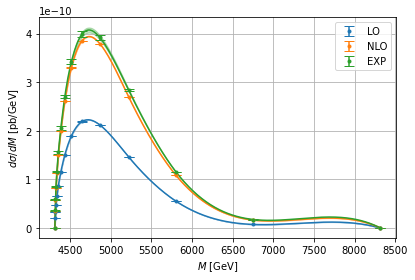

In [11]:
for run_plot in [False,]:
    for diff_m,scenario in [(4000,"scenarioA.in"),]:
        pdfs = [("MSHT20lo_as130","MSHT20nlo_as118"), #("CT18NLO","CT18NLO"),  ("NNPDF40_lo_as_01180","NNPDF40_nlo_as_01180")
        ]
        for lo_pdf,nlo_pdf in pdfs:
            for p in [2000002]:
                li = [hepi.Input(hepi.Order.NLO_PLUS_NLL, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.001,max_iters=25,id="r1")]

                
                li = hepi.scan_invariant_mass(li, diff_m,14+1)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False)

                if not run_plot:
                    #dl = hepi.scale_error(li,dl)
                    plot.data([],[],init=True,data_color='k')
                    #mask = dl["LO_SCALE"]!=np.array(None)
                    dl["EXP"] = -dl["NLO_PLUS_NLL"]
                    hepi.plot(dl, "invariant_mass", "LO",           plot_data=True,fill=True,logy=False, label="LO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    hepi.plot(dl, "invariant_mass", "NLO",         plot_data=True,fill=True,logy=False, label="NLO",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    hepi.plot(dl, "invariant_mass", "EXP", plot_data=True,fill=True,logy=False, label="EXP",xaxis="$M$ [GeV]",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plt.show()
                    #plt.savefig(input.get_output_dir() + get_job_name() +  "_inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")

                    #hepi.mass_and_ratio_plot(dl,li,"invariant_mass",scale=True,plot_data=False,fill=True,scenario=scenario[0:8]+ " " + scenario[8],yscale=10**6,unit="ab")
                    #plt.savefig(input.get_output_dir()+ get_job_name()+"_mass_and_ratio_" + nlo_pdf + "_" + str(p)+ "_" + str("inv") + "_" +str(scenario) + ".pdf",bbox_inches = 'tight', pad_inches = 0)
    #wait()



2862.3316600000003
Running: 15 jobs


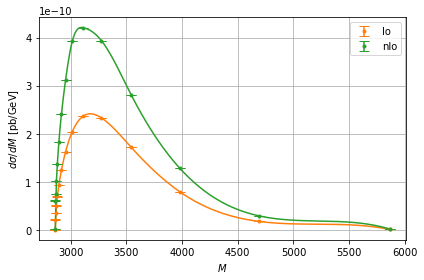

AttributeError: 'function' object has no attribute 'get_output_dir'

In [5]:
for run_plot in [False ]:
    for scenario in ["scenarioB.in"]:
        for lo_pdf,nlo_pdf in [("CT18NLO","CT18NLO")]:
            for p in [1000021]:
                li = [hepi.Input(hepi.Order.NLO, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.1)]

                li = hepi.scan_invariant_mass(li, 3000, 15)
                print(li[0].invariant_mass)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False, True)

                if not run_plot:
                    
                    plot.data([],[],init=True)
                    hepi.plot(dl, "invariant_mass", "lo", logy=False, label="lo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    hepi.plot(dl, "invariant_mass", "nlo", logy=False, label="nlo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo_plus_nll", logy=False, label="nlo+nll",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    #plt.savefig(input.get_output_dir() + "inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                                                                                                                                                            